In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

 CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFF_PURCHASES : Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES : Amount of purchase done in installment
CASH_ADVANCE : Cash in advance given by the user
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASES_TRX : Numbe of purchase transactions made
CREDIT_LIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

Here are some explanations of each feature in the credit card holder dataset:

- CUST_ID: Unique identifier for each customer. Useful for grouping records by customer.

- BALANCE: The outstanding amount the customer owes. Important to understand spending habits.

- BALANCE_FREQUENCY: Indicates how often the balance is updated, which reflects transaction frequency. High value means active usage.

- PURCHASES: Total amount spent by the customer using the card. Key spending behavior metric. 

- ONEOFF_PURCHASES: The highest single transaction amount. Shows spending capacity.

- INSTALLMENTS_PURCHASES: Total amount spent in installment plans. Indicates use of credit financing.

- CASH_ADVANCE: Cash withdrawn from the credit line. Signals need for short-term funds.

- PURCHASES_FREQUENCY: How often purchases occur. Frequent use indicates engagement with the card.

- ONEOFFPURCHASESFREQUENCY: Frequency of large one-off purchases. Reflects big ticket spending behavior.

- PURCHASESINSTALLMENTSFREQUENCY: Frequency of installment transactions. Shows propensity to take on credit. 

- CASHADVANCEFREQUENCY: Frequency of cash advance transactions. More usage indicates reliance on credit line.

- CASHADVANCETRX: Number of cash advance transactions. More transactions equals more need for short-term credit.

- PURCHASES_TRX: Total number of purchases. Higher indicates more card usage.

- CREDIT_LIMIT: Maximum credit amount available. Limits spending capacity.

- PAYMENTS: Amount paid back by the customer against the balance. Indicates repayment behavior.

- MINIMUM_PAYMENTS: Minimum repayments made. Lower amounts signal credit dependence. 

- PRCFULLPAYMENT: Percent of balance paid off each month. Higher is better.

- TENURE: How long the account has been open. Longer tenure associated with better understanding of customer.

Let me know if you need any clarification or have additional questions!

## Importing Necessary Library

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display

In [3]:
def SevenSigma(df):
    print(f"shape of the dataset is : {df.shape}")
    print("")
    print("")
    print("Sample from Dataset")
    display(df.sample(5))
    print("")
    print("")
    print("information of Dataset")
    display(df.info())
    print("")
    print("")
    print("description of Dataset for numeric features")
    display(df.describe().T)
    print("")
    print("")
    print("description of Dataset for categorical features")
    display(df.describe(exclude=np.number).T)
    print("")
    print("")
    print("corelation")
    sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2)
    fig=plt.gcf()
    fig.set_size_inches(20,20)
    plt.show()
    print("")
    print("")
    print("null values in dataset")
    display(df.isnull().mean()*100)
    print("")
    print("")
    print("duplicate rows in dataset")
    display(df[df.duplicated()])

In [4]:
def summarize_columns(cols, df):
    """
    Print summary stats for specified columns
    """
    
    print("Summary Statistics:")
    
    for col in cols:
        print(f"\n{col}")
        print(f"- Mean: {df[col].mean():.2f}")
        print(f"- Median: {df[col].median():.2f}")
        print(f"- Std: {df[col].std():.2f}") 
        print(f"- Min: {df[col].min():.2f}")
        print(f"- Max: {df[col].max():.2f}")

# Data Ingestion

In [5]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

# Data Exploration

In [6]:
#SevenSigma(df)

> # **Handling Missing Values**

In [7]:
# in CREDIT_LIMIT feature thers only one row with null value so let's drop it.
df.drop(index=5203,inplace=True)

In [8]:
# MINIMUM_PAYMENTS have 3.5% null values and also contains outliers so replacing null values with median.
MINIMUM_PAYMENTS_median = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(MINIMUM_PAYMENTS_median,inplace=True)

Here are some suggestions for logical groups of features to analyze together from this credit card customer data:

- Spending amount features: ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'] - Analyze together to understand spending behavior.

- Spending frequency features: ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'] - Analyze together to understand transaction frequency. 

- Transaction count features: ['CASH_ADVANCE_TRX', 'PURCHASES_TRX'] - Analyze together to understand transaction volume.

- Payment features: ['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] - Analyze together to understand repayment behavior. 

- Credit limit features: ['CREDIT_LIMIT', 'BALANCE'] - Analyze together to understand credit utilization.

- Customer profile: ['CUST_ID', 'TENURE'] - Analyze together to understand per-customer patterns.

- Balance activity: ['BALANCE', 'BALANCE_FREQUENCY'] - Analyze together to understand balance behavior.

- Cash advance-related features:

CASH_ADVANCE
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX

Analyzing features in logical groups like this can reveal insights about different aspects of customer credit card usage. The key is finding features that provide related or complementary information that can yield deeper understanding when explored together.

Let me know if you need any other examples of good feature groupings for this credit card data!

## Spending amount features

['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'] 

In [9]:
summarize_columns(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE'],df)

Summary Statistics:

PURCHASES
- Mean: 1003.32
- Median: 361.49
- Std: 2136.73
- Min: 0.00
- Max: 49039.57

ONEOFF_PURCHASES
- Mean: 592.50
- Median: 38.00
- Std: 1659.97
- Min: 0.00
- Max: 40761.25

INSTALLMENTS_PURCHASES
- Mean: 411.11
- Median: 89.00
- Std: 904.38
- Min: 0.00
- Max: 22500.00

CASH_ADVANCE
- Mean: 978.96
- Median: 0.00
- Std: 2097.26
- Min: 0.00
- Max: 47137.21


In [10]:
fig = make_subplots(rows=2,cols=2)

fig.add_trace(go.Violin(x=df['PURCHASES'], showlegend=False, box_visible=True, line_color='purple', fillcolor='rgba(200, 0, 200, 0.3)'),
              row=1, col=2)

fig.add_trace(go.Violin(x=df['ONEOFF_PURCHASES'], showlegend=False, box_visible=True, line_color='purple', fillcolor='rgba(200, 0, 200, 0.3)'),
              row=1, col=2)

fig.add_trace(go.Violin(x=df['INSTALLMENTS_PURCHASES'], showlegend=False, box_visible=True, line_color='purple', fillcolor='rgba(200, 0, 200, 0.3)'),
              row=2, col=1)

fig.add_trace(go.Violin(x=df['CASH_ADVANCE'], showlegend=False, box_visible=True, line_color='purple', fillcolor='rgba(200, 0, 200, 0.3)'),
              row=2, col=2)

fig.update_layout(title_text='Distribution of Spending amount features', height=300, width=1200, showlegend=True,)  
fig.show()

In [11]:
px.scatter(df,x='PURCHASES',y='ONEOFF_PURCHASES',trendline="ols")

## Spending frequency features 

['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']

In [12]:
summarize_columns(['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'],df)

Summary Statistics:

PURCHASES_FREQUENCY
- Mean: 0.49
- Median: 0.50
- Std: 0.40
- Min: 0.00
- Max: 1.00

ONEOFF_PURCHASES_FREQUENCY
- Mean: 0.20
- Median: 0.08
- Std: 0.30
- Min: 0.00
- Max: 1.00

PURCHASES_INSTALLMENTS_FREQUENCY
- Mean: 0.36
- Median: 0.17
- Std: 0.40
- Min: 0.00
- Max: 1.00

CASH_ADVANCE_FREQUENCY
- Mean: 0.14
- Median: 0.00
- Std: 0.20
- Min: 0.00
- Max: 1.50


In [13]:
fig = make_subplots(rows=2,cols=2)

fig.add_trace(trace=go.Histogram(x=df['PURCHASES_FREQUENCY'],nbinsx=10),
              row=1,col=1)

fig.add_trace(trace=go.Histogram(x=df['ONEOFF_PURCHASES_FREQUENCY'],nbinsx=10),
              row=1,col=2)

fig.add_trace(trace=go.Histogram(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'],nbinsx=10),
              row=2,col=1)

fig.add_trace(trace=go.Histogram(x=df['CASH_ADVANCE_FREQUENCY'],nbinsx=10),
              row=2,col=2)


<Axes: ylabel='Density'>

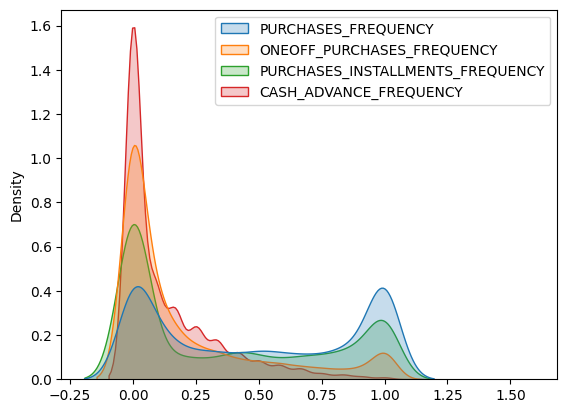

In [14]:
sns.kdeplot(data=df[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']],fill=True)

## Transaction count features

['CASH_ADVANCE_TRX', 'PURCHASES_TRX']

In [15]:
summarize_columns(['CASH_ADVANCE_TRX', 'PURCHASES_TRX'],df)

Summary Statistics:

CASH_ADVANCE_TRX
- Mean: 3.25
- Median: 0.00
- Std: 6.82
- Min: 0.00
- Max: 123.00

PURCHASES_TRX
- Mean: 14.71
- Median: 7.00
- Std: 24.86
- Min: 0.00
- Max: 358.00


In [16]:
fig = make_subplots(rows=2,cols=1)

fig.add_trace(go.Violin(x=df['CASH_ADVANCE_TRX'], showlegend=False, box_visible=True, line_color='purple', fillcolor='rgba(200, 0, 200, 0.3)'),
              row=1, col=1)
fig.add_trace(go.Violin(x=df['PURCHASES_TRX'], showlegend=False, box_visible=True, line_color='purple', fillcolor='rgba(200, 0, 200, 0.3)'),
              row=2, col=1)
fig.show()

<Axes: ylabel='Density'>

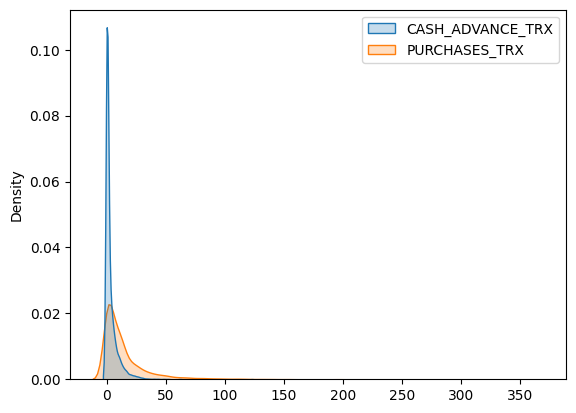

In [17]:
sns.kdeplot(data=df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX']],fill=True)

## Payment features: 
['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [18]:
summarize_columns(['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],df)

Summary Statistics:

PAYMENTS
- Mean: 1733.34
- Median: 857.06
- Std: 2895.17
- Min: 0.00
- Max: 50721.48

MINIMUM_PAYMENTS
- Mean: 845.00
- Median: 312.45
- Std: 2332.91
- Min: 0.02
- Max: 76406.21

PRC_FULL_PAYMENT
- Mean: 0.15
- Median: 0.00
- Std: 0.29
- Min: 0.00
- Max: 1.00
